In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [110]:
filenames=['stores.csv','features.csv','train.csv', 'test.csv']

In [111]:
dataframes = [pd.read_csv(f,parse_dates=True, ) for f in filenames]

In [62]:
dataframes[0].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [63]:
dataframes[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [64]:
dataframes[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


#### Merged the three dataframes


In [65]:
df =dataframes[2].merge(dataframes[1]  ,on=['Store', 'Date','IsHoliday'],how='left').merge(dataframes[0],on='Store')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [66]:
df['Date']=pd.to_datetime(df['Date'])

#### Plotting the weekly sale of 5 departments of store 1 for the entire duration i.e. Febb 2010 to Nov 2012 .

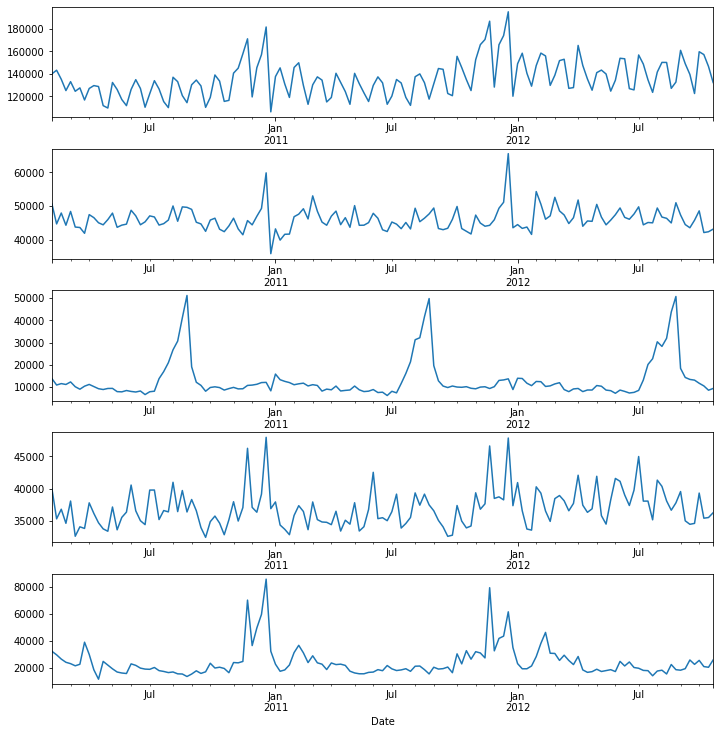

In [67]:
d=df.set_index('Date')
fig,axes=plt.subplots(nrows=5,ncols=1,figsize=(10, 10))
fig.tight_layout()
d['Weekly_Sales'][(d.Dept==92)& (d.Store==1) ].plot(ax=axes[0])
d['Weekly_Sales'][(d.Dept==2) & (d.Store==1)].plot(ax=axes[1])
d['Weekly_Sales'][(d.Dept==3) & (d.Store==1)].plot(ax=axes[2])
d['Weekly_Sales'][(d.Dept==4) & (d.Store==1)].plot(ax=axes[3])
d['Weekly_Sales'][(d.Dept==5) & (d.Store==1)].plot(ax=axes[4])


In [68]:
df[(df['Store']==1) & (df['Dept']==39)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size


#### Plotting the heat map to represent the correlation between various variables

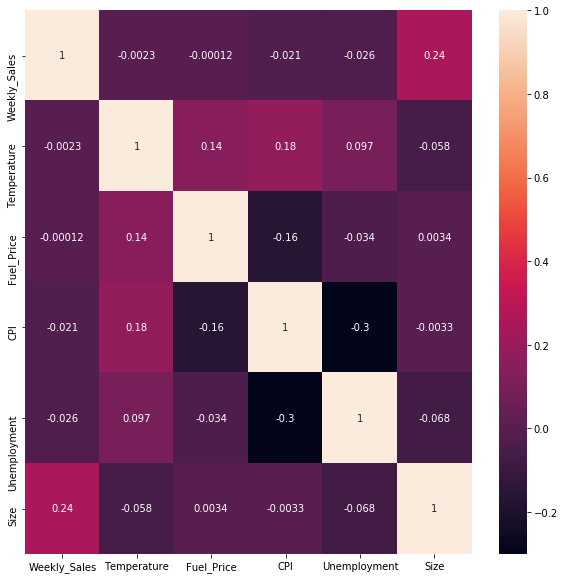

In [121]:
d=df.loc[:,['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Size']]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(d.corr(), annot=True)
plt.show()


#### Plotting the distribution of size for different type of stores

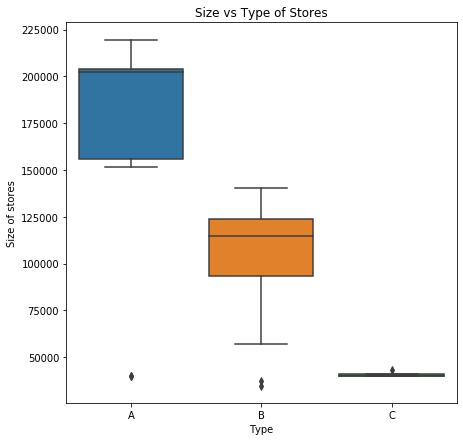

In [122]:
grouped=df.groupby('Type')['Weekly_Sales'].mean()
#grouped.describe()['Size']

plt.figure(figsize=(7,7))
sns.boxplot(x='Type', y='Size', data=dataframes[0])
plt.title("Size vs Type of Stores")
plt.ylabel('Size of stores')

#plt.ylim((0,100000))55
plt.show()

#### Plotting  the distribution of weekly sales across different types of stores

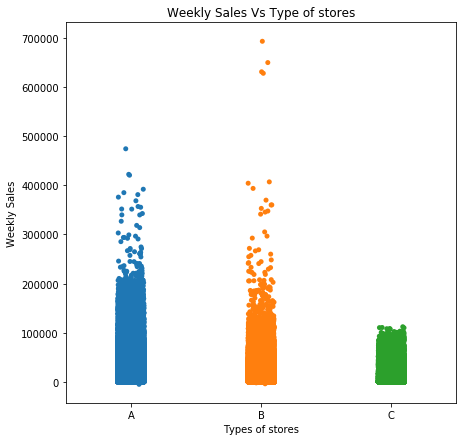

In [124]:
plt.figure(figsize=(7,7))
sns.stripplot(x='Type', y='Weekly_Sales', data=df)
plt.ylabel('Weekly Sales')
plt.xlabel('Types of stores')
plt.title("Weekly Sales Vs Type of stores")
#plt.ylim((0,100000))55
plt.show()

####  Plotting  the distribution of weekly sales on holidays and on other days

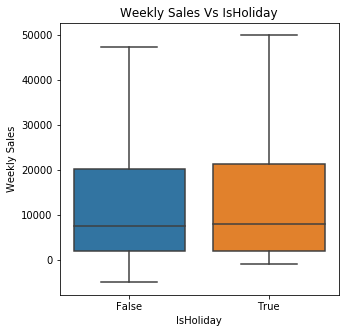

In [72]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df,showfliers=False)
plt.ylabel('Weekly Sales')
plt.xlabel('IsHoliday')
plt.title("Weekly Sales Vs IsHoliday")
#plt.ylim((0,70000))
plt.show()

####  Plotting  the distribution of weekly sales across different stores

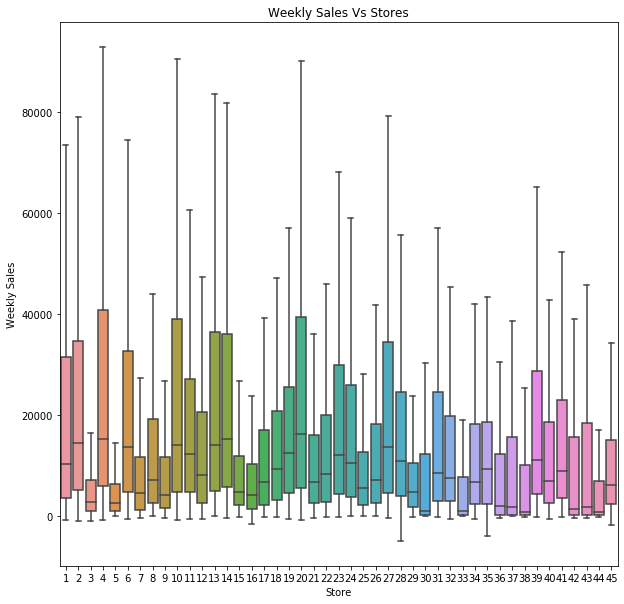

In [73]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Store', y='Weekly_Sales', data=df,showfliers=False)
plt.ylabel('Weekly Sales')
plt.xlabel('Store')
plt.title("Weekly Sales Vs Stores")
#plt.ylim((0,70000))
plt.show()

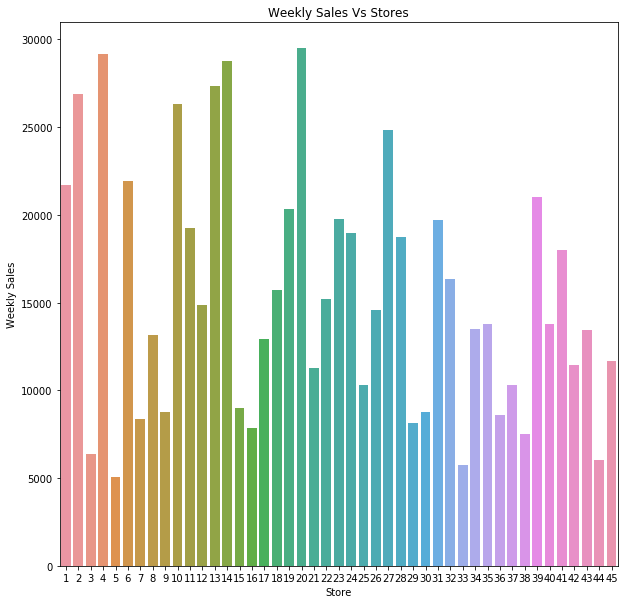

In [74]:
d=df.groupby('Store')[['Weekly_Sales']].mean()
d=d.reset_index()
plt.figure(figsize=(10, 10))
sns.barplot(x='Store', y='Weekly_Sales', data=d)
plt.ylabel('Weekly Sales')
plt.xlabel('Store')
plt.title("Weekly Sales Vs Stores")
#plt.ylim((0,70000))
plt.show()

#### Plotting  the distribution of weekly sales across different departments

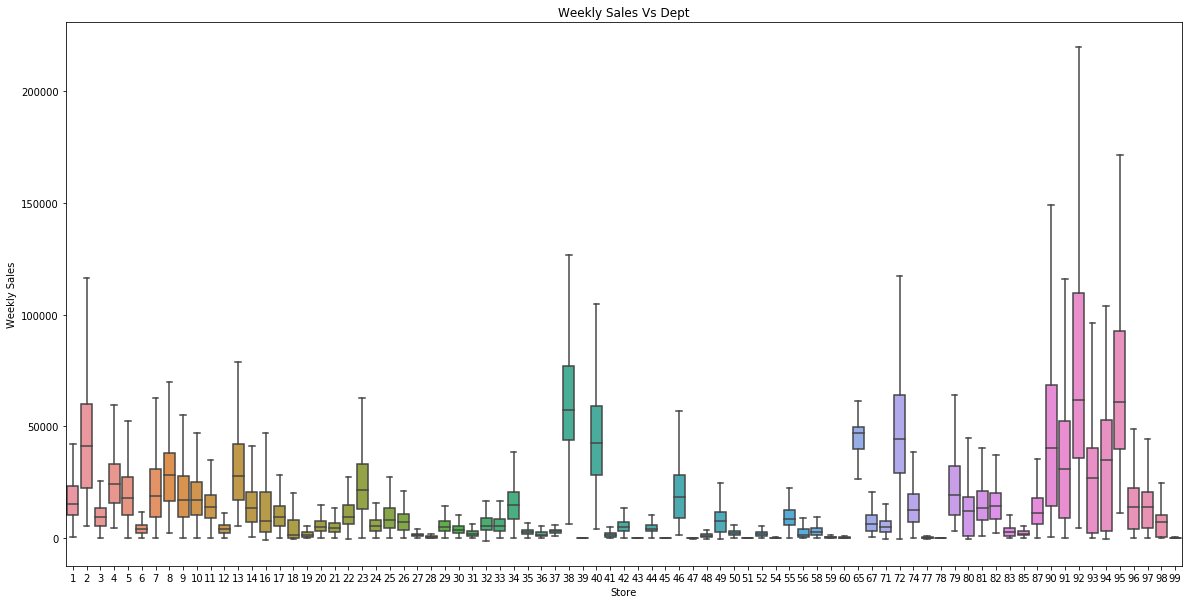

In [75]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Dept', y='Weekly_Sales', data=df,showfliers=False)
plt.ylabel('Weekly Sales')
plt.xlabel('Store')
plt.title("Weekly Sales Vs Dept")
#plt.ylim((0,70000))
plt.show()

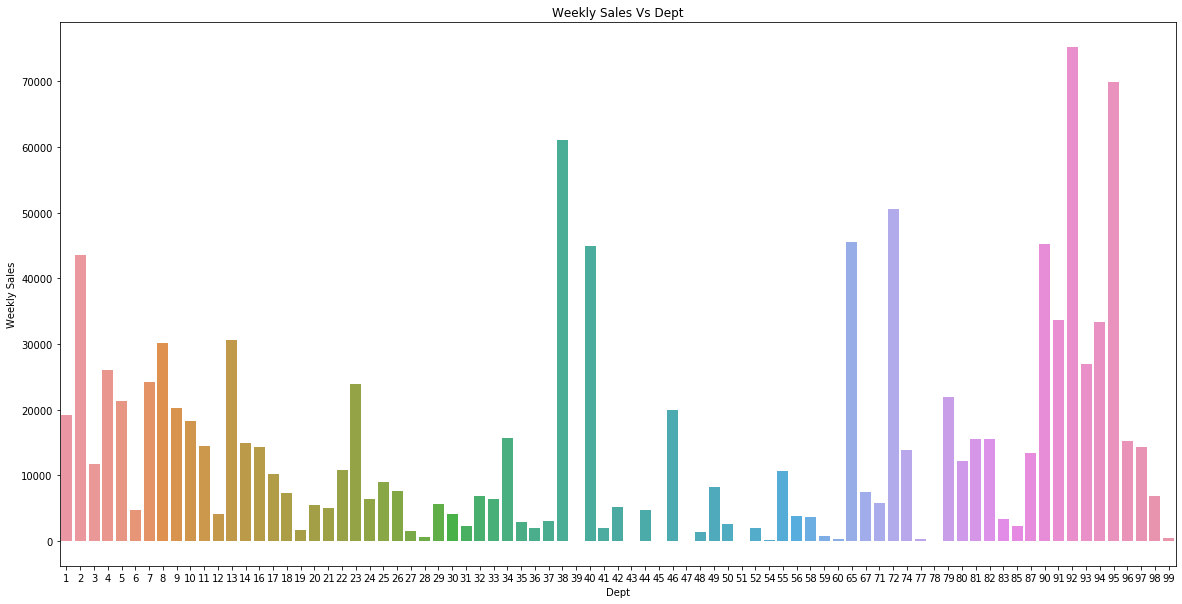

In [76]:
d=df.groupby('Dept')[['Weekly_Sales']].mean()
d=d.reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x='Dept', y='Weekly_Sales', data=d)
plt.ylabel('Weekly Sales')
plt.xlabel('Dept')
plt.title("Weekly Sales Vs Dept")
#plt.ylim((0,70000))
plt.show()


In [113]:
output_resources= {'dataframes':dataframes}


pickle.dump(output_resources,open( "resources_pickled.p", "wb" ))
df.to_csv('data_cleaned.csv')